# Neural Network - Classification
Using the top 10 features

### Importing Libraries and Data

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [2]:
with open("top10_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling

In [3]:
scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Functions

In [5]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

## Modeling - NN Classification

In [6]:
# Instatiating the model
model = Sequential()

activ = "relu"
# Input Layer
model.add(Dense(100, activation=activ,input_shape=(X.shape[1],)))

# Hidden Layers (11)
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dropout(.5))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dropout(.5))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dropout(.3))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))
model.add(Dense(100, activation=activ))

# Output Layer
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [8]:
res = model.fit(X_train, y_train, epochs=2500, batch_size=128, validation_data=(X_test, y_test))


Train on 20056 samples, validate on 6686 samples
Epoch 1/2500
20056/20056 [==============================] - 2s 110us/step - loss: 0.7457 - accuracy: 0.3337 - val_loss: 0.6453 - val_accuracy: 0.3358
Epoch 2/2500
20056/20056 [==============================] - 1s 69us/step - loss: 0.6587 - accuracy: 0.3325 - val_loss: 0.6468 - val_accuracy: 0.3358
Epoch 3/2500
20056/20056 [==============================] - 2s 76us/step - loss: 0.6525 - accuracy: 0.3325 - val_loss: 0.6580 - val_accuracy: 0.3358
Epoch 4/2500
20056/20056 [==============================] - 1s 70us/step - loss: 0.6521 - accuracy: 0.3327 - val_loss: 0.6557 - val_accuracy: 0.3358
Epoch 5/2500
20056/20056 [==============================] - 2s 76us/step - loss: 0.6479 - accuracy: 0.3326 - val_loss: 0.6401 - val_accuracy: 0.3358
Epoch 6/2500
20056/20056 [==============================] - 2s 76us/step - loss: 0.6509 - accuracy: 0.3325 - val_loss: 0.6406 - val_accuracy: 0.3358
Epoch 7/2500
20056/20056 [=============================

Epoch 54/2500
20056/20056 [==============================] - 1s 69us/step - loss: 0.6374 - accuracy: 0.3326 - val_loss: 0.6412 - val_accuracy: 0.3356
Epoch 55/2500
20056/20056 [==============================] - 2s 75us/step - loss: 0.6373 - accuracy: 0.3325 - val_loss: 0.6384 - val_accuracy: 0.3358
Epoch 56/2500
20056/20056 [==============================] - 2s 76us/step - loss: 0.6377 - accuracy: 0.3327 - val_loss: 0.6371 - val_accuracy: 0.3356
Epoch 57/2500
20056/20056 [==============================] - 2s 81us/step - loss: 0.6356 - accuracy: 0.3326 - val_loss: 0.6422 - val_accuracy: 0.3356
Epoch 58/2500
20056/20056 [==============================] - 1s 70us/step - loss: 0.6356 - accuracy: 0.3325 - val_loss: 0.6403 - val_accuracy: 0.3356
Epoch 59/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.6365 - accuracy: 0.3325 - val_loss: 0.6388 - val_accuracy: 0.3358
Epoch 60/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.6346 - accuracy:

20056/20056 [==============================] - 1s 62us/step - loss: 0.6218 - accuracy: 0.3324 - val_loss: 0.6443 - val_accuracy: 0.3358
Epoch 109/2500
20056/20056 [==============================] - 1s 63us/step - loss: 0.6228 - accuracy: 0.3326 - val_loss: 0.6472 - val_accuracy: 0.3356
Epoch 110/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.6211 - accuracy: 0.3326 - val_loss: 0.6466 - val_accuracy: 0.3356
Epoch 111/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.6224 - accuracy: 0.3325 - val_loss: 0.6419 - val_accuracy: 0.3358
Epoch 112/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.6247 - accuracy: 0.3416 - val_loss: 0.6425 - val_accuracy: 0.3356
Epoch 113/2500
20056/20056 [==============================] - 1s 63us/step - loss: 0.6239 - accuracy: 0.3326 - val_loss: 0.6446 - val_accuracy: 0.3358
Epoch 114/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.6216 - accuracy: 0.3325 

20056/20056 [==============================] - 1s 62us/step - loss: 0.5988 - accuracy: 0.3763 - val_loss: 0.6527 - val_accuracy: 0.3673
Epoch 163/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.6003 - accuracy: 0.3760 - val_loss: 0.6529 - val_accuracy: 0.3596
Epoch 164/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.5990 - accuracy: 0.3750 - val_loss: 0.6534 - val_accuracy: 0.3657
Epoch 165/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.6015 - accuracy: 0.3749 - val_loss: 0.6542 - val_accuracy: 0.3621
Epoch 166/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.5975 - accuracy: 0.3790 - val_loss: 0.6514 - val_accuracy: 0.3654
Epoch 167/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.5971 - accuracy: 0.3769 - val_loss: 0.6639 - val_accuracy: 0.3646
Epoch 168/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.5966 - accuracy: 0.3805 

20056/20056 [==============================] - 1s 55us/step - loss: 0.5786 - accuracy: 0.3954 - val_loss: 0.6706 - val_accuracy: 0.3712
Epoch 217/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5748 - accuracy: 0.3979 - val_loss: 0.6689 - val_accuracy: 0.3624
Epoch 218/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5746 - accuracy: 0.3963 - val_loss: 0.6729 - val_accuracy: 0.3666
Epoch 219/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.5757 - accuracy: 0.3961 - val_loss: 0.6656 - val_accuracy: 0.3657
Epoch 220/2500
20056/20056 [==============================] - 1s 51us/step - loss: 0.5701 - accuracy: 0.4032 - val_loss: 0.6657 - val_accuracy: 0.3696
Epoch 221/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5704 - accuracy: 0.4045 - val_loss: 0.6674 - val_accuracy: 0.3609
Epoch 222/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5723 - accuracy: 0.4028 

20056/20056 [==============================] - 1s 54us/step - loss: 0.5553 - accuracy: 0.4180 - val_loss: 0.6849 - val_accuracy: 0.3655
Epoch 271/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.5540 - accuracy: 0.4207 - val_loss: 0.6811 - val_accuracy: 0.3660
Epoch 272/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.5544 - accuracy: 0.4226 - val_loss: 0.6763 - val_accuracy: 0.3681
Epoch 273/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5533 - accuracy: 0.4223 - val_loss: 0.6759 - val_accuracy: 0.3667
Epoch 274/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5545 - accuracy: 0.4196 - val_loss: 0.6752 - val_accuracy: 0.3649
Epoch 275/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5521 - accuracy: 0.4191 - val_loss: 0.6742 - val_accuracy: 0.3652
Epoch 276/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5536 - accuracy: 0.4188 

20056/20056 [==============================] - 1s 53us/step - loss: 0.5346 - accuracy: 0.4371 - val_loss: 0.6859 - val_accuracy: 0.3708
Epoch 325/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5345 - accuracy: 0.4398 - val_loss: 0.6926 - val_accuracy: 0.3679
Epoch 326/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.5349 - accuracy: 0.4411 - val_loss: 0.6862 - val_accuracy: 0.3634
Epoch 327/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5410 - accuracy: 0.4338 - val_loss: 0.6892 - val_accuracy: 0.3664
Epoch 328/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.5431 - accuracy: 0.4329 - val_loss: 0.6808 - val_accuracy: 0.3649
Epoch 329/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5383 - accuracy: 0.4335 - val_loss: 0.6805 - val_accuracy: 0.3706
Epoch 330/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.5334 - accuracy: 0.4410 

20056/20056 [==============================] - 1s 53us/step - loss: 0.5229 - accuracy: 0.4479 - val_loss: 0.6921 - val_accuracy: 0.3648
Epoch 379/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5188 - accuracy: 0.4521 - val_loss: 0.7095 - val_accuracy: 0.3717
Epoch 380/2500
20056/20056 [==============================] - 1s 51us/step - loss: 0.5244 - accuracy: 0.4517 - val_loss: 0.6839 - val_accuracy: 0.3588
Epoch 381/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.5259 - accuracy: 0.4483 - val_loss: 0.6930 - val_accuracy: 0.3661
Epoch 382/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.5310 - accuracy: 0.4472 - val_loss: 0.6879 - val_accuracy: 0.3670
Epoch 383/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5262 - accuracy: 0.4492 - val_loss: 0.6879 - val_accuracy: 0.3636
Epoch 384/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5199 - accuracy: 0.4530 

20056/20056 [==============================] - 1s 53us/step - loss: 0.5154 - accuracy: 0.4579 - val_loss: 0.6930 - val_accuracy: 0.3714
Epoch 433/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.5105 - accuracy: 0.4635 - val_loss: 0.6971 - val_accuracy: 0.3709
Epoch 434/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.5071 - accuracy: 0.4625 - val_loss: 0.6926 - val_accuracy: 0.3721
Epoch 435/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5131 - accuracy: 0.4625 - val_loss: 0.6994 - val_accuracy: 0.3711
Epoch 436/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.5042 - accuracy: 0.4670 - val_loss: 0.7049 - val_accuracy: 0.3717
Epoch 437/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.5084 - accuracy: 0.4669 - val_loss: 0.6913 - val_accuracy: 0.3666
Epoch 438/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.5082 - accuracy: 0.4647 

20056/20056 [==============================] - 1s 54us/step - loss: 0.5049 - accuracy: 0.4693 - val_loss: 0.6992 - val_accuracy: 0.3697
Epoch 487/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4989 - accuracy: 0.4736 - val_loss: 0.6911 - val_accuracy: 0.3703
Epoch 488/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.5014 - accuracy: 0.4700 - val_loss: 0.6961 - val_accuracy: 0.3714
Epoch 489/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4963 - accuracy: 0.4784 - val_loss: 0.7085 - val_accuracy: 0.3727
Epoch 490/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5025 - accuracy: 0.4709 - val_loss: 0.7087 - val_accuracy: 0.3678
Epoch 491/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.5144 - accuracy: 0.4625 - val_loss: 0.6921 - val_accuracy: 0.3693
Epoch 492/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.5123 - accuracy: 0.4572 

20056/20056 [==============================] - 1s 54us/step - loss: 0.4905 - accuracy: 0.4801 - val_loss: 0.7003 - val_accuracy: 0.3715
Epoch 541/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4852 - accuracy: 0.4807 - val_loss: 0.7041 - val_accuracy: 0.3678
Epoch 542/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4842 - accuracy: 0.4867 - val_loss: 0.7069 - val_accuracy: 0.3691
Epoch 543/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4855 - accuracy: 0.4844 - val_loss: 0.7128 - val_accuracy: 0.3753
Epoch 544/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4845 - accuracy: 0.4855 - val_loss: 0.7142 - val_accuracy: 0.3727
Epoch 545/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4851 - accuracy: 0.4852 - val_loss: 0.7055 - val_accuracy: 0.3735
Epoch 546/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4818 - accuracy: 0.4855 

20056/20056 [==============================] - 1s 54us/step - loss: 0.4841 - accuracy: 0.4847 - val_loss: 0.7065 - val_accuracy: 0.3648
Epoch 595/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4755 - accuracy: 0.4924 - val_loss: 0.7132 - val_accuracy: 0.3690
Epoch 596/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4885 - accuracy: 0.4836 - val_loss: 0.7130 - val_accuracy: 0.3693
Epoch 597/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4842 - accuracy: 0.4871 - val_loss: 0.7134 - val_accuracy: 0.3735
Epoch 598/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4773 - accuracy: 0.4936 - val_loss: 0.7193 - val_accuracy: 0.3700
Epoch 599/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4777 - accuracy: 0.4945 - val_loss: 0.7021 - val_accuracy: 0.3729
Epoch 600/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4798 - accuracy: 0.4897 

20056/20056 [==============================] - 1s 53us/step - loss: 0.4748 - accuracy: 0.4919 - val_loss: 0.7223 - val_accuracy: 0.3691
Epoch 649/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4747 - accuracy: 0.4935 - val_loss: 0.7185 - val_accuracy: 0.3711
Epoch 650/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4687 - accuracy: 0.5008 - val_loss: 0.7169 - val_accuracy: 0.3735
Epoch 651/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4720 - accuracy: 0.4984 - val_loss: 0.7151 - val_accuracy: 0.3724
Epoch 652/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4720 - accuracy: 0.4924 - val_loss: 0.7088 - val_accuracy: 0.3691
Epoch 653/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4686 - accuracy: 0.4984 - val_loss: 0.7140 - val_accuracy: 0.3697
Epoch 654/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4745 - accuracy: 0.4926 

20056/20056 [==============================] - 1s 53us/step - loss: 0.4628 - accuracy: 0.5081 - val_loss: 0.7151 - val_accuracy: 0.3759
Epoch 703/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4634 - accuracy: 0.5037 - val_loss: 0.7234 - val_accuracy: 0.3718
Epoch 704/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4795 - accuracy: 0.4911 - val_loss: 0.7034 - val_accuracy: 0.3672
Epoch 705/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4688 - accuracy: 0.5013 - val_loss: 0.7109 - val_accuracy: 0.3709
Epoch 706/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4733 - accuracy: 0.5018 - val_loss: 0.7048 - val_accuracy: 0.3691
Epoch 707/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4669 - accuracy: 0.5039 - val_loss: 0.7110 - val_accuracy: 0.3732
Epoch 708/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4725 - accuracy: 0.5005 

20056/20056 [==============================] - 1s 54us/step - loss: 0.4576 - accuracy: 0.5100 - val_loss: 0.7256 - val_accuracy: 0.3712
Epoch 757/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4571 - accuracy: 0.5129 - val_loss: 0.7176 - val_accuracy: 0.3705
Epoch 758/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4561 - accuracy: 0.5136 - val_loss: 0.7249 - val_accuracy: 0.3667
Epoch 759/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4626 - accuracy: 0.5054 - val_loss: 0.7188 - val_accuracy: 0.3732
Epoch 760/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4577 - accuracy: 0.5116 - val_loss: 0.7321 - val_accuracy: 0.3745
Epoch 761/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4549 - accuracy: 0.5140 - val_loss: 0.7310 - val_accuracy: 0.3714
Epoch 762/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4556 - accuracy: 0.5156 

20056/20056 [==============================] - 1s 55us/step - loss: 0.4513 - accuracy: 0.5180 - val_loss: 0.7232 - val_accuracy: 0.3681
Epoch 811/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4565 - accuracy: 0.5157 - val_loss: 0.7179 - val_accuracy: 0.3640
Epoch 812/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4574 - accuracy: 0.5136 - val_loss: 0.7230 - val_accuracy: 0.3681
Epoch 813/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4577 - accuracy: 0.5116 - val_loss: 0.7252 - val_accuracy: 0.3724
Epoch 814/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4658 - accuracy: 0.5114 - val_loss: 0.7172 - val_accuracy: 0.3673
Epoch 815/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4704 - accuracy: 0.5026 - val_loss: 0.7250 - val_accuracy: 0.3690
Epoch 816/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4561 - accuracy: 0.5133 

20056/20056 [==============================] - 1s 54us/step - loss: 0.4524 - accuracy: 0.5172 - val_loss: 0.7413 - val_accuracy: 0.3754
Epoch 865/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4487 - accuracy: 0.5209 - val_loss: 0.7192 - val_accuracy: 0.3748
Epoch 866/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4488 - accuracy: 0.5188 - val_loss: 0.7256 - val_accuracy: 0.3762
Epoch 867/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4518 - accuracy: 0.5196 - val_loss: 0.7331 - val_accuracy: 0.3750
Epoch 868/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4489 - accuracy: 0.5220 - val_loss: 0.7304 - val_accuracy: 0.3708
Epoch 869/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4491 - accuracy: 0.5210 - val_loss: 0.7262 - val_accuracy: 0.3766
Epoch 870/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4504 - accuracy: 0.5213 

20056/20056 [==============================] - 1s 53us/step - loss: 0.4482 - accuracy: 0.5219 - val_loss: 0.7349 - val_accuracy: 0.3754
Epoch 919/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4530 - accuracy: 0.5191 - val_loss: 0.7331 - val_accuracy: 0.3697
Epoch 920/2500
20056/20056 [==============================] - 1s 51us/step - loss: 0.4440 - accuracy: 0.5291 - val_loss: 0.7219 - val_accuracy: 0.3738
Epoch 921/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4465 - accuracy: 0.5246 - val_loss: 0.7227 - val_accuracy: 0.3681
Epoch 922/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4455 - accuracy: 0.5234 - val_loss: 0.7319 - val_accuracy: 0.3727
Epoch 923/2500
20056/20056 [==============================] - 1s 51us/step - loss: 0.4453 - accuracy: 0.5248 - val_loss: 0.7344 - val_accuracy: 0.3717
Epoch 924/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4392 - accuracy: 0.5306 

20056/20056 [==============================] - 1s 60us/step - loss: 0.4396 - accuracy: 0.5340 - val_loss: 0.7437 - val_accuracy: 0.3732
Epoch 973/2500
20056/20056 [==============================] - 1s 63us/step - loss: 0.4459 - accuracy: 0.5223 - val_loss: 0.7353 - val_accuracy: 0.3706
Epoch 974/2500
20056/20056 [==============================] - 1s 60us/step - loss: 0.4383 - accuracy: 0.5320 - val_loss: 0.7341 - val_accuracy: 0.3693
Epoch 975/2500
20056/20056 [==============================] - 1s 60us/step - loss: 0.4411 - accuracy: 0.5296 - val_loss: 0.7346 - val_accuracy: 0.3741
Epoch 976/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4558 - accuracy: 0.5183 - val_loss: 0.7323 - val_accuracy: 0.3690
Epoch 977/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4571 - accuracy: 0.5165 - val_loss: 0.7199 - val_accuracy: 0.3694
Epoch 978/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4449 - accuracy: 0.5282 

20056/20056 [==============================] - 1s 61us/step - loss: 0.4414 - accuracy: 0.5335 - val_loss: 0.7476 - val_accuracy: 0.3733
Epoch 1027/2500
20056/20056 [==============================] - 1s 59us/step - loss: 0.4346 - accuracy: 0.5374 - val_loss: 0.7392 - val_accuracy: 0.3724
Epoch 1028/2500
20056/20056 [==============================] - 1s 60us/step - loss: 0.4326 - accuracy: 0.5366 - val_loss: 0.7422 - val_accuracy: 0.3762
Epoch 1029/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.4257 - accuracy: 0.5430 - val_loss: 0.7445 - val_accuracy: 0.3741
Epoch 1030/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.4309 - accuracy: 0.5412 - val_loss: 0.7372 - val_accuracy: 0.3727
Epoch 1031/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4322 - accuracy: 0.5374 - val_loss: 0.7437 - val_accuracy: 0.3729
Epoch 1032/2500
20056/20056 [==============================] - 1s 59us/step - loss: 0.4365 - accuracy: 0

20056/20056 [==============================] - 1s 61us/step - loss: 0.4300 - accuracy: 0.5397 - val_loss: 0.7491 - val_accuracy: 0.3735
Epoch 1081/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4270 - accuracy: 0.5394 - val_loss: 0.7378 - val_accuracy: 0.3760
Epoch 1082/2500
20056/20056 [==============================] - 1s 60us/step - loss: 0.4319 - accuracy: 0.5408 - val_loss: 0.7329 - val_accuracy: 0.3735
Epoch 1083/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4264 - accuracy: 0.5385 - val_loss: 0.7386 - val_accuracy: 0.3751
Epoch 1084/2500
20056/20056 [==============================] - 1s 60us/step - loss: 0.4272 - accuracy: 0.5450 - val_loss: 0.7268 - val_accuracy: 0.3717
Epoch 1085/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4356 - accuracy: 0.5383 - val_loss: 0.7421 - val_accuracy: 0.3741
Epoch 1086/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.4273 - accuracy: 0

20056/20056 [==============================] - 1s 65us/step - loss: 0.4231 - accuracy: 0.5447 - val_loss: 0.7445 - val_accuracy: 0.3742
Epoch 1135/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.4329 - accuracy: 0.5376 - val_loss: 0.7311 - val_accuracy: 0.3676
Epoch 1136/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.4247 - accuracy: 0.5453 - val_loss: 0.7416 - val_accuracy: 0.3715
Epoch 1137/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4309 - accuracy: 0.5412 - val_loss: 0.7407 - val_accuracy: 0.3702
Epoch 1138/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.4351 - accuracy: 0.5357 - val_loss: 0.7326 - val_accuracy: 0.3766
Epoch 1139/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.4281 - accuracy: 0.5438 - val_loss: 0.7381 - val_accuracy: 0.3775
Epoch 1140/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.4281 - accuracy: 0

20056/20056 [==============================] - 1s 53us/step - loss: 0.4225 - accuracy: 0.5420 - val_loss: 0.7491 - val_accuracy: 0.3765
Epoch 1189/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4164 - accuracy: 0.5518 - val_loss: 0.7480 - val_accuracy: 0.3756
Epoch 1190/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4192 - accuracy: 0.5508 - val_loss: 0.7546 - val_accuracy: 0.3751
Epoch 1191/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4271 - accuracy: 0.5425 - val_loss: 0.7376 - val_accuracy: 0.3703
Epoch 1192/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4332 - accuracy: 0.5364 - val_loss: 0.7426 - val_accuracy: 0.3700
Epoch 1193/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.4236 - accuracy: 0.5469 - val_loss: 0.7585 - val_accuracy: 0.3774
Epoch 1194/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4253 - accuracy: 0

Epoch 1242/2500
20056/20056 [==============================] - 1s 70us/step - loss: 0.4215 - accuracy: 0.5468 - val_loss: 0.7609 - val_accuracy: 0.3733
Epoch 1243/2500
20056/20056 [==============================] - 2s 76us/step - loss: 0.4169 - accuracy: 0.5501 - val_loss: 0.7462 - val_accuracy: 0.3687
Epoch 1244/2500
20056/20056 [==============================] - 1s 71us/step - loss: 0.4197 - accuracy: 0.5478 - val_loss: 0.7545 - val_accuracy: 0.3709
Epoch 1245/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.4316 - accuracy: 0.5383 - val_loss: 0.7369 - val_accuracy: 0.3669
Epoch 1246/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.4258 - accuracy: 0.5435 - val_loss: 0.7412 - val_accuracy: 0.3715
Epoch 1247/2500
20056/20056 [==============================] - 2s 87us/step - loss: 0.4242 - accuracy: 0.5420 - val_loss: 0.7504 - val_accuracy: 0.3727
Epoch 1248/2500
20056/20056 [==============================] - 2s 88us/step - loss: 0.42

Epoch 1296/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.4217 - accuracy: 0.5483 - val_loss: 0.7458 - val_accuracy: 0.3718
Epoch 1297/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.4217 - accuracy: 0.5469 - val_loss: 0.7591 - val_accuracy: 0.3679
Epoch 1298/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.4186 - accuracy: 0.5482 - val_loss: 0.7500 - val_accuracy: 0.3726
Epoch 1299/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.4183 - accuracy: 0.5494 - val_loss: 0.7506 - val_accuracy: 0.3744
Epoch 1300/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.4766 - accuracy: 0.5065 - val_loss: 0.7258 - val_accuracy: 0.3648
Epoch 1301/2500
20056/20056 [==============================] - 1s 69us/step - loss: 0.4382 - accuracy: 0.5321 - val_loss: 0.7452 - val_accuracy: 0.3717
Epoch 1302/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.42

Epoch 1350/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.4092 - accuracy: 0.5562 - val_loss: 0.7446 - val_accuracy: 0.3733
Epoch 1351/2500
20056/20056 [==============================] - 1s 69us/step - loss: 0.4061 - accuracy: 0.5606 - val_loss: 0.7580 - val_accuracy: 0.3757
Epoch 1352/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.4149 - accuracy: 0.5545 - val_loss: 0.7493 - val_accuracy: 0.3720
Epoch 1353/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.4141 - accuracy: 0.5539 - val_loss: 0.7567 - val_accuracy: 0.3754
Epoch 1354/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.4096 - accuracy: 0.5570 - val_loss: 0.7439 - val_accuracy: 0.3786
Epoch 1355/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.4156 - accuracy: 0.5511 - val_loss: 0.7418 - val_accuracy: 0.3672
Epoch 1356/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.41

Epoch 1404/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4143 - accuracy: 0.5552 - val_loss: 0.7624 - val_accuracy: 0.3775
Epoch 1405/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4146 - accuracy: 0.5536 - val_loss: 0.7440 - val_accuracy: 0.3723
Epoch 1406/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4087 - accuracy: 0.5576 - val_loss: 0.7612 - val_accuracy: 0.3757
Epoch 1407/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4189 - accuracy: 0.5523 - val_loss: 0.7421 - val_accuracy: 0.3781
Epoch 1408/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4129 - accuracy: 0.5578 - val_loss: 0.7424 - val_accuracy: 0.3763
Epoch 1409/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4133 - accuracy: 0.5573 - val_loss: 0.7485 - val_accuracy: 0.3777
Epoch 1410/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.40

Epoch 1458/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4114 - accuracy: 0.5580 - val_loss: 0.7537 - val_accuracy: 0.3774
Epoch 1459/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4084 - accuracy: 0.5595 - val_loss: 0.7515 - val_accuracy: 0.3729
Epoch 1460/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4179 - accuracy: 0.5573 - val_loss: 0.7513 - val_accuracy: 0.3708
Epoch 1461/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4229 - accuracy: 0.5510 - val_loss: 0.7480 - val_accuracy: 0.3744
Epoch 1462/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4091 - accuracy: 0.5604 - val_loss: 0.7547 - val_accuracy: 0.3735
Epoch 1463/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4087 - accuracy: 0.5619 - val_loss: 0.7557 - val_accuracy: 0.3765
Epoch 1464/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.45

Epoch 1512/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4058 - accuracy: 0.5604 - val_loss: 0.7615 - val_accuracy: 0.3759
Epoch 1513/2500
20056/20056 [==============================] - 1s 51us/step - loss: 0.4043 - accuracy: 0.5614 - val_loss: 0.7563 - val_accuracy: 0.3763
Epoch 1514/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4089 - accuracy: 0.5593 - val_loss: 0.7592 - val_accuracy: 0.3754
Epoch 1515/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4173 - accuracy: 0.5582 - val_loss: 0.7481 - val_accuracy: 0.3750
Epoch 1516/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4146 - accuracy: 0.5564 - val_loss: 0.7354 - val_accuracy: 0.3741
Epoch 1517/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4205 - accuracy: 0.5501 - val_loss: 0.7500 - val_accuracy: 0.3778
Epoch 1518/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.42

Epoch 1566/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4163 - accuracy: 0.5546 - val_loss: 0.7583 - val_accuracy: 0.3738
Epoch 1567/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4023 - accuracy: 0.5675 - val_loss: 0.7477 - val_accuracy: 0.3745
Epoch 1568/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4045 - accuracy: 0.5658 - val_loss: 0.7614 - val_accuracy: 0.3723
Epoch 1569/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.3994 - accuracy: 0.5681 - val_loss: 0.7631 - val_accuracy: 0.3783
Epoch 1570/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4066 - accuracy: 0.5623 - val_loss: 0.7629 - val_accuracy: 0.3768
Epoch 1571/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4076 - accuracy: 0.5620 - val_loss: 0.7464 - val_accuracy: 0.3694
Epoch 1572/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.40

Epoch 1620/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4168 - accuracy: 0.5547 - val_loss: 0.7615 - val_accuracy: 0.3751
Epoch 1621/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4036 - accuracy: 0.5653 - val_loss: 0.7528 - val_accuracy: 0.3750
Epoch 1622/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4003 - accuracy: 0.5658 - val_loss: 0.7658 - val_accuracy: 0.3724
Epoch 1623/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4120 - accuracy: 0.5562 - val_loss: 0.7603 - val_accuracy: 0.3756
Epoch 1624/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4027 - accuracy: 0.5649 - val_loss: 0.7447 - val_accuracy: 0.3735
Epoch 1625/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4003 - accuracy: 0.5667 - val_loss: 0.7586 - val_accuracy: 0.3708
Epoch 1626/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.41

Epoch 1674/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.3991 - accuracy: 0.5702 - val_loss: 0.7650 - val_accuracy: 0.3812
Epoch 1675/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4090 - accuracy: 0.5591 - val_loss: 0.7506 - val_accuracy: 0.3706
Epoch 1676/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4019 - accuracy: 0.5688 - val_loss: 0.7686 - val_accuracy: 0.3751
Epoch 1677/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4033 - accuracy: 0.5638 - val_loss: 0.7593 - val_accuracy: 0.3711
Epoch 1678/2500
20056/20056 [==============================] - 1s 52us/step - loss: 0.4042 - accuracy: 0.5643 - val_loss: 0.7551 - val_accuracy: 0.3744
Epoch 1679/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4049 - accuracy: 0.5628 - val_loss: 0.7546 - val_accuracy: 0.3694
Epoch 1680/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.40

Epoch 1728/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4030 - accuracy: 0.5647 - val_loss: 0.7595 - val_accuracy: 0.3727
Epoch 1729/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.3962 - accuracy: 0.5734 - val_loss: 0.7761 - val_accuracy: 0.3771
Epoch 1730/2500
20056/20056 [==============================] - 1s 58us/step - loss: 0.3914 - accuracy: 0.5773 - val_loss: 0.7636 - val_accuracy: 0.3745
Epoch 1731/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4085 - accuracy: 0.5643 - val_loss: 0.7563 - val_accuracy: 0.3714
Epoch 1732/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.3930 - accuracy: 0.5714 - val_loss: 0.7563 - val_accuracy: 0.3790
Epoch 1733/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.3991 - accuracy: 0.5684 - val_loss: 0.7674 - val_accuracy: 0.3733
Epoch 1734/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.40

Epoch 1782/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4003 - accuracy: 0.5695 - val_loss: 0.7470 - val_accuracy: 0.3718
Epoch 1783/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4269 - accuracy: 0.5432 - val_loss: 0.7532 - val_accuracy: 0.3717
Epoch 1784/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4208 - accuracy: 0.5508 - val_loss: 0.7398 - val_accuracy: 0.3759
Epoch 1785/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4521 - accuracy: 0.5258 - val_loss: 0.7416 - val_accuracy: 0.3759
Epoch 1786/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4262 - accuracy: 0.5417 - val_loss: 0.7482 - val_accuracy: 0.3750
Epoch 1787/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.4084 - accuracy: 0.5598 - val_loss: 0.7553 - val_accuracy: 0.3706
Epoch 1788/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.41

Epoch 1836/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.3971 - accuracy: 0.5717 - val_loss: 0.7695 - val_accuracy: 0.3808
Epoch 1837/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.3929 - accuracy: 0.5748 - val_loss: 0.7664 - val_accuracy: 0.3812
Epoch 1838/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4000 - accuracy: 0.5703 - val_loss: 0.7694 - val_accuracy: 0.3780
Epoch 1839/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4137 - accuracy: 0.5548 - val_loss: 0.7434 - val_accuracy: 0.3754
Epoch 1840/2500
20056/20056 [==============================] - 1s 53us/step - loss: 0.3985 - accuracy: 0.5706 - val_loss: 0.7728 - val_accuracy: 0.3736
Epoch 1841/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.4119 - accuracy: 0.5588 - val_loss: 0.7447 - val_accuracy: 0.3823
Epoch 1842/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.41

Epoch 1890/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.4051 - accuracy: 0.5641 - val_loss: 0.7701 - val_accuracy: 0.3766
Epoch 1891/2500
20056/20056 [==============================] - 1s 59us/step - loss: 0.3913 - accuracy: 0.5795 - val_loss: 0.7601 - val_accuracy: 0.3730
Epoch 1892/2500
20056/20056 [==============================] - 1s 54us/step - loss: 0.3899 - accuracy: 0.5789 - val_loss: 0.7586 - val_accuracy: 0.3786
Epoch 1893/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.4004 - accuracy: 0.5718 - val_loss: 0.7519 - val_accuracy: 0.3736
Epoch 1894/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.3940 - accuracy: 0.5768 - val_loss: 0.7759 - val_accuracy: 0.3760
Epoch 1895/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.3970 - accuracy: 0.5720 - val_loss: 0.7793 - val_accuracy: 0.3792
Epoch 1896/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.38

Epoch 1944/2500
20056/20056 [==============================] - 1s 69us/step - loss: 0.3891 - accuracy: 0.5796 - val_loss: 0.7800 - val_accuracy: 0.3754
Epoch 1945/2500
20056/20056 [==============================] - 2s 75us/step - loss: 0.3909 - accuracy: 0.5807 - val_loss: 0.7953 - val_accuracy: 0.3781
Epoch 1946/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3908 - accuracy: 0.5789 - val_loss: 0.7769 - val_accuracy: 0.3759
Epoch 1947/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.3956 - accuracy: 0.5732 - val_loss: 0.7690 - val_accuracy: 0.3736
Epoch 1948/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.3915 - accuracy: 0.5772 - val_loss: 0.7740 - val_accuracy: 0.3748
Epoch 1949/2500
20056/20056 [==============================] - 2s 83us/step - loss: 0.3931 - accuracy: 0.5761 - val_loss: 0.7783 - val_accuracy: 0.3797
Epoch 1950/2500
20056/20056 [==============================] - 1s 71us/step - loss: 0.38

Epoch 1998/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.3924 - accuracy: 0.5736 - val_loss: 0.7773 - val_accuracy: 0.3760
Epoch 1999/2500
20056/20056 [==============================] - 1s 63us/step - loss: 0.3976 - accuracy: 0.5725 - val_loss: 0.7523 - val_accuracy: 0.3778
Epoch 2000/2500
20056/20056 [==============================] - 1s 65us/step - loss: 0.3859 - accuracy: 0.5829 - val_loss: 0.7813 - val_accuracy: 0.3803
Epoch 2001/2500
20056/20056 [==============================] - 1s 71us/step - loss: 0.3886 - accuracy: 0.5811 - val_loss: 0.7734 - val_accuracy: 0.3744
Epoch 2002/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.3935 - accuracy: 0.5783 - val_loss: 0.7830 - val_accuracy: 0.3741
Epoch 2003/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3902 - accuracy: 0.5793 - val_loss: 0.7792 - val_accuracy: 0.3786
Epoch 2004/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.38

Epoch 2052/2500
20056/20056 [==============================] - 2s 79us/step - loss: 0.4032 - accuracy: 0.5668 - val_loss: 0.7465 - val_accuracy: 0.3673
Epoch 2053/2500
20056/20056 [==============================] - 2s 78us/step - loss: 0.3961 - accuracy: 0.5674 - val_loss: 0.7779 - val_accuracy: 0.3757
Epoch 2054/2500
20056/20056 [==============================] - 2s 80us/step - loss: 0.4472 - accuracy: 0.5346 - val_loss: 0.7209 - val_accuracy: 0.3661
Epoch 2055/2500
20056/20056 [==============================] - 2s 76us/step - loss: 0.4402 - accuracy: 0.5383 - val_loss: 0.7476 - val_accuracy: 0.3682
Epoch 2056/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.4129 - accuracy: 0.5627 - val_loss: 0.7531 - val_accuracy: 0.3732
Epoch 2057/2500
20056/20056 [==============================] - 2s 76us/step - loss: 0.4172 - accuracy: 0.5541 - val_loss: 0.7599 - val_accuracy: 0.3727
Epoch 2058/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.39

Epoch 2106/2500
20056/20056 [==============================] - 1s 63us/step - loss: 0.4007 - accuracy: 0.5727 - val_loss: 0.7534 - val_accuracy: 0.3729
Epoch 2107/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.3927 - accuracy: 0.5789 - val_loss: 0.7568 - val_accuracy: 0.3670
Epoch 2108/2500
20056/20056 [==============================] - 1s 70us/step - loss: 0.4093 - accuracy: 0.5620 - val_loss: 0.7585 - val_accuracy: 0.3723
Epoch 2109/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.3912 - accuracy: 0.5788 - val_loss: 0.7584 - val_accuracy: 0.3760
Epoch 2110/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.3854 - accuracy: 0.5823 - val_loss: 0.7774 - val_accuracy: 0.3765
Epoch 2111/2500
20056/20056 [==============================] - 1s 64us/step - loss: 0.3897 - accuracy: 0.5783 - val_loss: 0.7702 - val_accuracy: 0.3762
Epoch 2112/2500
20056/20056 [==============================] - 1s 62us/step - loss: 0.38

Epoch 2160/2500
20056/20056 [==============================] - 1s 72us/step - loss: 0.3959 - accuracy: 0.5756 - val_loss: 0.7654 - val_accuracy: 0.3724
Epoch 2161/2500
20056/20056 [==============================] - 2s 89us/step - loss: 0.3909 - accuracy: 0.5772 - val_loss: 0.7631 - val_accuracy: 0.3729
Epoch 2162/2500
20056/20056 [==============================] - 1s 74us/step - loss: 0.3822 - accuracy: 0.5883 - val_loss: 0.7636 - val_accuracy: 0.3729
Epoch 2163/2500
20056/20056 [==============================] - 2s 86us/step - loss: 0.3801 - accuracy: 0.5840 - val_loss: 0.7743 - val_accuracy: 0.3712
Epoch 2164/2500
20056/20056 [==============================] - 2s 77us/step - loss: 0.3807 - accuracy: 0.5890 - val_loss: 0.7719 - val_accuracy: 0.3763
Epoch 2165/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.4343 - accuracy: 0.5442 - val_loss: 0.7496 - val_accuracy: 0.3753
Epoch 2166/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.39

Epoch 2214/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3892 - accuracy: 0.5818 - val_loss: 0.7603 - val_accuracy: 0.3715
Epoch 2215/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3887 - accuracy: 0.5797 - val_loss: 0.7799 - val_accuracy: 0.3748
Epoch 2216/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3975 - accuracy: 0.5715 - val_loss: 0.7770 - val_accuracy: 0.3726
Epoch 2217/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3832 - accuracy: 0.5883 - val_loss: 0.7810 - val_accuracy: 0.3738
Epoch 2218/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3753 - accuracy: 0.5905 - val_loss: 0.7829 - val_accuracy: 0.3784
Epoch 2219/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3930 - accuracy: 0.5765 - val_loss: 0.7738 - val_accuracy: 0.3757
Epoch 2220/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.38

Epoch 2268/2500
20056/20056 [==============================] - 1s 70us/step - loss: 0.3915 - accuracy: 0.5852 - val_loss: 0.7540 - val_accuracy: 0.3790
Epoch 2269/2500
20056/20056 [==============================] - 1s 73us/step - loss: 0.3933 - accuracy: 0.5786 - val_loss: 0.7527 - val_accuracy: 0.3812
Epoch 2270/2500
20056/20056 [==============================] - 2s 84us/step - loss: 0.3956 - accuracy: 0.5768 - val_loss: 0.7721 - val_accuracy: 0.3847
Epoch 2271/2500
20056/20056 [==============================] - 1s 69us/step - loss: 0.3929 - accuracy: 0.5799 - val_loss: 0.7648 - val_accuracy: 0.3821
Epoch 2272/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.4043 - accuracy: 0.5682 - val_loss: 0.7734 - val_accuracy: 0.3757
Epoch 2273/2500
20056/20056 [==============================] - 2s 75us/step - loss: 0.3764 - accuracy: 0.5928 - val_loss: 0.7759 - val_accuracy: 0.3823
Epoch 2274/2500
20056/20056 [==============================] - 1s 70us/step - loss: 0.38

Epoch 2322/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3917 - accuracy: 0.5851 - val_loss: 0.7783 - val_accuracy: 0.3748
Epoch 2323/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3841 - accuracy: 0.5902 - val_loss: 0.7723 - val_accuracy: 0.3792
Epoch 2324/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.3840 - accuracy: 0.5902 - val_loss: 0.7610 - val_accuracy: 0.3714
Epoch 2325/2500
20056/20056 [==============================] - 1s 68us/step - loss: 0.3900 - accuracy: 0.5814 - val_loss: 0.7504 - val_accuracy: 0.3769
Epoch 2326/2500
20056/20056 [==============================] - 1s 70us/step - loss: 0.3765 - accuracy: 0.5913 - val_loss: 0.7732 - val_accuracy: 0.3762
Epoch 2327/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3740 - accuracy: 0.5941 - val_loss: 0.7904 - val_accuracy: 0.3732
Epoch 2328/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.38

Epoch 2376/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3750 - accuracy: 0.5945 - val_loss: 0.7908 - val_accuracy: 0.3732
Epoch 2377/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3775 - accuracy: 0.5934 - val_loss: 0.7817 - val_accuracy: 0.3762
Epoch 2378/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3901 - accuracy: 0.5809 - val_loss: 0.7574 - val_accuracy: 0.3748
Epoch 2379/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3846 - accuracy: 0.5862 - val_loss: 0.7782 - val_accuracy: 0.3784
Epoch 2380/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.3791 - accuracy: 0.5909 - val_loss: 0.7759 - val_accuracy: 0.3733
Epoch 2381/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3831 - accuracy: 0.5889 - val_loss: 0.7773 - val_accuracy: 0.3826
Epoch 2382/2500
20056/20056 [==============================] - 1s 66us/step - loss: 0.37

Epoch 2430/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.3825 - accuracy: 0.5873 - val_loss: 0.7825 - val_accuracy: 0.3751
Epoch 2431/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.3770 - accuracy: 0.5947 - val_loss: 0.7783 - val_accuracy: 0.3753
Epoch 2432/2500
20056/20056 [==============================] - 1s 59us/step - loss: 0.3728 - accuracy: 0.5971 - val_loss: 0.7874 - val_accuracy: 0.3747
Epoch 2433/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.3733 - accuracy: 0.5954 - val_loss: 0.7755 - val_accuracy: 0.3769
Epoch 2434/2500
20056/20056 [==============================] - 1s 57us/step - loss: 0.3722 - accuracy: 0.5986 - val_loss: 0.7785 - val_accuracy: 0.3754
Epoch 2435/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.3701 - accuracy: 0.6011 - val_loss: 0.7833 - val_accuracy: 0.3741
Epoch 2436/2500
20056/20056 [==============================] - 1s 55us/step - loss: 0.37

Epoch 2484/2500
20056/20056 [==============================] - 1s 73us/step - loss: 0.3710 - accuracy: 0.5976 - val_loss: 0.7931 - val_accuracy: 0.3769
Epoch 2485/2500
20056/20056 [==============================] - 1s 59us/step - loss: 0.3832 - accuracy: 0.5899 - val_loss: 0.7548 - val_accuracy: 0.3759
Epoch 2486/2500
20056/20056 [==============================] - 1s 61us/step - loss: 0.3896 - accuracy: 0.5874 - val_loss: 0.7916 - val_accuracy: 0.3792
Epoch 2487/2500
20056/20056 [==============================] - 1s 56us/step - loss: 0.3692 - accuracy: 0.6008 - val_loss: 0.7779 - val_accuracy: 0.3763
Epoch 2488/2500
20056/20056 [==============================] - 1s 58us/step - loss: 0.3758 - accuracy: 0.5968 - val_loss: 0.7809 - val_accuracy: 0.3744
Epoch 2489/2500
20056/20056 [==============================] - 1s 67us/step - loss: 0.3843 - accuracy: 0.5926 - val_loss: 0.7674 - val_accuracy: 0.3793
Epoch 2490/2500
20056/20056 [==============================] - 1s 63us/step - loss: 0.38

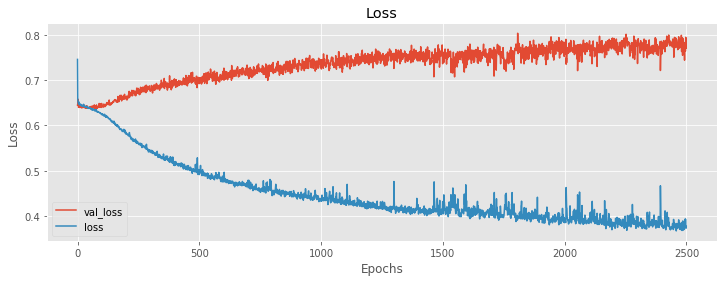

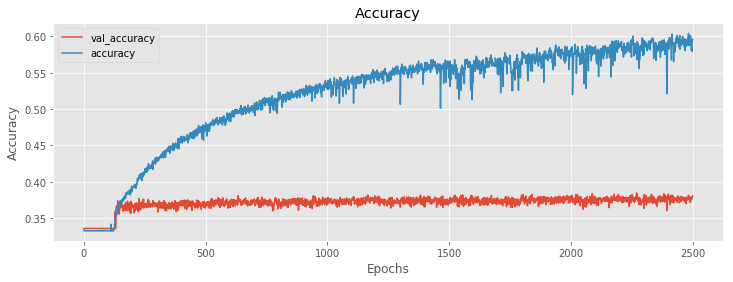

In [9]:
visualize_training_results(res)

The loss and accuracy may show signs of overfitting but the validation accuracy appears to have reached its limit. More epochs or more layers/nodes will most likely not solve the issue. 

A Neural Network most likely will not beat the results from other classification models such as XGBoost.